In [74]:
import torch

In [75]:
import torchvision


In [76]:
from torchvision import transforms as T


In [77]:
from PIL import Image

In [78]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(pretrained = "true")

In [79]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [80]:
ig = Image.open("image5.jpg")

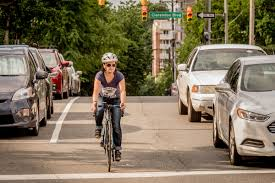

In [81]:
ig

In [82]:
transform = T.ToTensor()
img = transform(ig)

In [83]:
with torch.no_grad():
    pred = model([img])

In [84]:
pred

[{'boxes': tensor([[2.1181e+02, 5.3154e+01, 2.7500e+02, 1.6603e+02],
          [9.0793e+01, 5.2459e+01, 1.2698e+02, 1.5843e+02],
          [1.7457e+02, 4.3200e+01, 2.6642e+02, 1.2140e+02],
          [1.4318e-01, 4.5746e+01, 5.1000e+01, 1.3705e+02],
          [3.6330e+01, 4.8705e+01, 7.1332e+01, 9.9399e+01],
          [9.6971e+01, 9.7834e+01, 1.2351e+02, 1.6986e+02],
          [1.8658e+02, 6.1159e+00, 1.9281e+02, 2.0306e+01],
          [2.8966e+01, 4.6996e+01, 5.4809e+01, 1.2377e+02],
          [6.3511e+01, 6.1018e+01, 8.0927e+01, 9.6302e+01],
          [1.4137e+02, 3.5675e+00, 1.4805e+02, 2.2197e+01],
          [5.2364e+01, 5.0343e+01, 7.3470e+01, 9.6770e+01],
          [2.1112e+02, 5.9781e+01, 2.4211e+02, 1.5487e+02],
          [9.2794e+01, 1.0481e+02, 1.0357e+02, 1.3954e+02],
          [5.7296e+01, 4.9714e+01, 6.8369e+01, 6.7706e+01],
          [5.4327e-02, 4.8165e+01, 3.2079e+01, 1.2004e+02],
          [1.9680e+02, 1.1763e+01, 2.0136e+02, 1.8469e+01],
          [5.7564e+01, 4.9409e+

In [85]:
bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [86]:
num = torch.argwhere(scores>0.4).shape[0]
num

10

In [87]:
coco_names = ["person","bicycle", "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush",]

In [88]:
import cv2

In [89]:
igg = cv2.imread("image5.jpg")

In [90]:
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    print(x1,y1,x2,y2)
    break

211 53 275 166


In [91]:
font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    class_name = coco_names[labels.numpy()[i]-1]
    score = scores[i].item()
    score_text = f"{score:.2f}"
    igg = cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
    label = f"{class_name} ({score_text})"
    igg = cv2.putText(igg, label, (x1,y1-10),font,0.3,(255,0,0),1,cv2.LINE_AA)

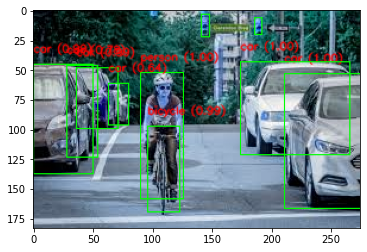

In [92]:
import matplotlib.pyplot as plt
plt.imshow(igg)


In [98]:
ig = Image.open("plane.jpg")
transform = T.ToTensor()
img = transform(ig)
with torch.no_grad():
    pred = model([img])

bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]
num = torch.argwhere(scores>.6).shape[0]



In [99]:
igg = cv2.imread("plane.jpg")

In [100]:
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    print(x1,y1,x2,y2)
    break

292 521 307 543


In [101]:
font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    class_name = coco_names[labels.numpy()[i]-1]
    score = scores[i].item()
    score_text = f"{score:.2f}"
    igg = cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
    label = f"{class_name} ({score_text})"
    igg = cv2.putText(igg, label, (x1,y1-10),font,0.9,(255,0,0),1,cv2.LINE_AA)

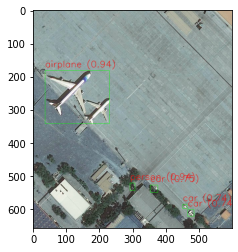

In [102]:
import matplotlib.pyplot as plt
plt.imshow(igg)

In [194]:
ig = Image.open("acars.jpg")
transform = T.ToTensor()
img = transform(ig)
with torch.no_grad():
    pred = model([img])

bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]
num = torch.argwhere(scores>0.8).shape[0]
igg = cv2.imread("acars.jpg")


In [195]:
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    print(x1,y1,x2,y2)
    break

905 123 1033 179


In [196]:
font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    class_name = coco_names[labels.numpy()[i]-1]
    score = scores[i].item()
    score_text = f"{score:.2f}"
    igg = cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
    label = f"{class_name} ({score_text})"
    igg = cv2.putText(igg, label, (x1,y1-10),font,0.9,(255,0,0),1,cv2.LINE_AA)

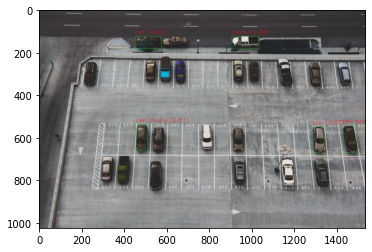

In [197]:
import matplotlib.pyplot as plt
plt.imshow(igg)

In [74]:
bboxes

tensor([[2.1181e+02, 5.3154e+01, 2.7500e+02, 1.6603e+02],
        [9.0793e+01, 5.2459e+01, 1.2698e+02, 1.5843e+02],
        [1.7457e+02, 4.3200e+01, 2.6642e+02, 1.2140e+02],
        [1.4318e-01, 4.5746e+01, 5.1000e+01, 1.3705e+02],
        [3.6330e+01, 4.8705e+01, 7.1332e+01, 9.9399e+01],
        [9.6971e+01, 9.7834e+01, 1.2351e+02, 1.6986e+02],
        [1.8658e+02, 6.1159e+00, 1.9281e+02, 2.0306e+01],
        [2.8966e+01, 4.6996e+01, 5.4809e+01, 1.2377e+02],
        [6.3511e+01, 6.1018e+01, 8.0927e+01, 9.6302e+01],
        [1.4137e+02, 3.5675e+00, 1.4805e+02, 2.2197e+01],
        [5.2364e+01, 5.0343e+01, 7.3470e+01, 9.6770e+01],
        [2.1112e+02, 5.9781e+01, 2.4211e+02, 1.5487e+02],
        [9.2794e+01, 1.0481e+02, 1.0357e+02, 1.3954e+02],
        [5.7296e+01, 4.9714e+01, 6.8369e+01, 6.7706e+01],
        [5.4327e-02, 4.8165e+01, 3.2079e+01, 1.2004e+02],
        [1.9680e+02, 1.1763e+01, 2.0136e+02, 1.8469e+01],
        [5.7564e+01, 4.9409e+01, 6.4485e+01, 6.2502e+01],
        [4.446

In [75]:
# import torch
# from PIL import Image
# import os
# from pycocotools.coco import COCO
# import numpy as np

# # Function to calculate IoU (Intersection over Union)
# def calculate_iou(boxA, boxB):
#     xA = max(boxA[0], boxB[0])
#     yA = max(boxA[1], boxB[1])
#     xB = min(boxA[2], boxB[2])
#     yB = min(boxA[3], boxB[3])
    
#     interArea = max(0, xB - xA) * max(0, yB - yA)
#     boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
#     boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
#     unionArea = boxAArea + boxBArea - interArea
    
#     iou = interArea / unionArea
#     return iou

# # Paths
# ann_file = r'C:\Users\LENOVO\Practices\nf\subset_annotations.json'  # COCO annotation file
# image_dir = r'C:\Users\LENOVO\Practices\nf'  # Folder containing original images

# # Load COCO annotations
# coco = COCO(ann_file)

# # Load your pre-trained model
# model.eval()  # Set model to evaluation mode

# # IoU threshold for determining a "true positive"
# iou_threshold = 0.6

# # For calculating precision
# total_true_positives = 0
# total_false_positives = 0

# # Get all image IDs
# image_ids = coco.getImgIds()

# # Process each image
# for img_id in image_ids:
#     # Load image and its annotations
#     img_info = coco.loadImgs(img_id)[0]
#     image_path = os.path.join(image_dir, img_info['file_name'])
#     image = Image.open(image_path).convert('RGB')
    
#     # Transform the image (if necessary)
#     image_tensor = T.ToTensor()(image).unsqueeze(0)
    
#     # Ground truth annotations
#     ann_ids = coco.getAnnIds(imgIds=img_id)
#     anns = coco.loadAnns(ann_ids)
#     true_boxes = [ann['bbox'] for ann in anns]  # Ground truth bounding boxes
    
#     # Convert COCO bbox format (x, y, width, height) to (x1, y1, x2, y2)
#     true_boxes = [[x, y, x + w, y + h] for (x, y, w, h) in true_boxes]
    
#     # Model predictions
#     with torch.no_grad():
#         predictions = model(image_tensor)
    
#     pred_boxes = predictions[0]['boxes'].cpu().numpy()  # Predicted bounding boxes
#     pred_scores = predictions[0]['scores'].cpu().numpy()  # Prediction confidence scores
    
#     # Filter out predictions with low scores (e.g., below 0.5 confidence)
#     score_threshold = 0.9
#     pred_boxes = pred_boxes[pred_scores > score_threshold]
    
#     # Match predicted boxes to ground truth boxes using IoU
#     matched_true_boxes = set()  # To track ground truth boxes that have been matched
#     true_positives = 0
#     false_positives = 0
    
#     for pred_box in pred_boxes:
#         best_iou = 0
#         best_gt_box = None
        
#         # Find the ground truth box with the highest IoU for this prediction
#         for i, true_box in enumerate(true_boxes):
#             iou = calculate_iou(pred_box, true_box)
#             if iou > best_iou:
#                 best_iou = iou
#                 best_gt_box = i
        
#         # If IoU is above the threshold, count as a true positive, else false positive
#         if best_iou >= iou_threshold and best_gt_box not in matched_true_boxes:
#             true_positives += 1
#             matched_true_boxes.add(best_gt_box)  # Mark the ground truth box as matched
#         else:
#             false_positives += 1
    
#     total_true_positives += true_positives
#     total_false_positives += false_positives

#     print(f"Processed image: {img_info['file_name']} - True Positives: {true_positives}, False Positives: {false_positives}")

# # Calculate Precision
# precision = total_true_positives / (total_true_positives + total_false_positives)

# print(f"Overall Precision: {precision:.4f}")


In [76]:
import torch
from PIL import Image
import os
from pycocotools.coco import COCO
import numpy as np

# Function to calculate IoU (Intersection over Union)
def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    unionArea = boxAArea + boxBArea - interArea
    
    iou = interArea / unionArea
    return iou

# Paths
ann_file = r'C:\Users\LENOVO\Practices\nf2\subset_annotations.json'  # COCO annotation file
image_dir = r'C:\Users\LENOVO\Practices\nf2'  # Folder containing original images

# Load COCO annotations
coco = COCO(ann_file)

# Load your pre-trained model
model.eval()  # Set model to evaluation mode

# IoU threshold for determining a "true positive"
iou_threshold = 0.6

# For calculating precision
total_true_positives = 0
total_false_positives = 0

# Get all image IDs
image_ids = coco.getImgIds()

# Process each image
for img_id in image_ids:
    # Load image and its annotations
    img_info = coco.loadImgs(img_id)[0]
    image_path = os.path.join(image_dir, img_info['file_name'])
    image = Image.open(image_path).convert('RGB')
    
    # Transform the image (if necessary)
    image_tensor = T.ToTensor()(image).unsqueeze(0)
    
    # Ground truth annotations
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    true_boxes = [ann['bbox'] for ann in anns]  # Ground truth bounding boxes
    
    # Convert COCO bbox format (x, y, width, height) to (x1, y1, x2, y2)
    true_boxes = [[x, y, x + w, y + h] for (x, y, w, h) in true_boxes]
    
    # Model predictions
    with torch.no_grad():
        predictions = model(image_tensor)
    
    pred_boxes = predictions[0]['boxes'].cpu().numpy()  # Predicted bounding boxes
    pred_scores = predictions[0]['scores'].cpu().numpy()  # Prediction confidence scores
    
    # Filter out predictions with low scores (e.g., below 0.5 confidence)
    score_threshold = 0.9
    pred_boxes = pred_boxes[pred_scores > score_threshold]
    
    # Match predicted boxes to ground truth boxes using IoU
    matched_true_boxes = set()  # To track ground truth boxes that have been matched
    true_positives = 0
    false_positives = 0
    
    for pred_box in pred_boxes:
        best_iou = 0
        best_gt_box = None
        
        # Find the ground truth box with the highest IoU for this prediction
        for i, true_box in enumerate(true_boxes):
            iou = calculate_iou(pred_box, true_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_box = i
        
        # If IoU is above the threshold, count as a true positive, else false positive
        if best_iou >= iou_threshold and best_gt_box not in matched_true_boxes:
            true_positives += 1
            matched_true_boxes.add(best_gt_box)  # Mark the ground truth box as matched
        else:
            false_positives += 1
    
    total_true_positives += true_positives
    total_false_positives += false_positives

    print(f"Processed image: {img_info['file_name']} - True Positives: {true_positives}, False Positives: {false_positives}")

# Calculate Precision
precision = total_true_positives / (total_true_positives + total_false_positives)

print(f"Overall Precision: {precision:.4f}")


loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Processed image: 2008_000138_jpg.rf.824d644432d3ca8bd695c98917a539f3.jpg - True Positives: 3, False Positives: 0
Processed image: 2011_004188_jpg.rf.4e0be9332df979cfe5c206341acb9c4a.jpg - True Positives: 1, False Positives: 1
Processed image: 2011_006966_jpg.rf.b95914fd1c0f6a78b14702065636b085.jpg - True Positives: 4, False Positives: 5
Processed image: 2008_003841_jpg.rf.593479a56eecc9d9b20d5dcf1bb9e006.jpg - True Positives: 1, False Positives: 0
Processed image: 2010_006329_jpg.rf.f43fa1b2045931bb4fad2f873e377b45.jpg - True Positives: 0, False Positives: 11
Processed image: 2008_001026_jpg.rf.133bbe5ff82e330061956672f128a946.jpg - True Positives: 1, False Positives: 0
Processed image: 2009_000351_jpg.rf.e806c5c3ea3c9e59b894ddbc48305c4c.jpg - True Positives: 1, False Positives: 0
Processed image: 2010_005734_jpg.rf.83b7cb1975b242f715453de44929f96e.jpg - True Positives: 1, False Positives: 1
Processed im

In [77]:
import torch
from PIL import Image
import os
from pycocotools.coco import COCO
import numpy as np

# Function to calculate IoU (Intersection over Union)
def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    unionArea = boxAArea + boxBArea - interArea
    
    iou = interArea / unionArea
    return iou

# Paths
ann_file = r'C:\Users\LENOVO\Practices\nf2\subset_annotations.json'  # COCO annotation file
image_dir = r'C:\Users\LENOVO\Practices\nf2'  # Folder containing original images

# Load COCO annotations
coco = COCO(ann_file)

# Load your pre-trained model
model.eval()  # Set model to evaluation mode

# IoU threshold for determining a "true positive"
iou_threshold = 0.6

# Get all image IDs
image_ids = coco.getImgIds()

# Process only one image (you can change the index to process a different image)
img_id = image_ids[0]  # You can change this to any image index you prefer

# Load image and its annotations
img_info = coco.loadImgs(img_id)[0]
image_path = os.path.join(image_dir, img_info['file_name'])
image = Image.open(image_path).convert('RGB')

# Transform the image (if necessary)
image_tensor = T.ToTensor()(image).unsqueeze(0)

# Ground truth annotations
ann_ids = coco.getAnnIds(imgIds=img_id)
anns = coco.loadAnns(ann_ids)
true_boxes = [ann['bbox'] for ann in anns]  # Ground truth bounding boxes

# Convert COCO bbox format (x, y, width, height) to (x1, y1, x2, y2)
true_boxes = [[x, y, x + w, y + h] for (x, y, w, h) in true_boxes]

# Print ground truth boxes
print(f"Ground truth boxes for image {img_info['file_name']}:")
for box in true_boxes:
    print(f"  {box}")

# Model predictions
with torch.no_grad():
    predictions = model(image_tensor)

pred_boxes = predictions[0]['boxes'].cpu().numpy()  # Predicted bounding boxes
pred_scores = predictions[0]['scores'].cpu().numpy()  # Prediction confidence scores

# Filter out predictions with low scores (e.g., below 0.5 confidence)
score_threshold = 0.9
pred_boxes = pred_boxes[pred_scores > score_threshold]

pred_boxes_int = []
for box in pred_boxes:
    x1, y1, x2, y2 = box
    x1, y1, x2, y2 = int(round(x1)), int(round(y1)), int(round(x2)), int(round(y2)) 
    x, y = int(x1), int(y1)
    w, h = int(x2 - x1), int(y2 - y1)
    pred_boxes_int.append([x, y, w, h])
    
# Print predicted boxes
print(f"\nPredicted boxes for image {img_info['file_name']}:")
for i, box in enumerate(pred_boxes_int):
    print(f"  {box} (score: {pred_scores[i]:.2f})")

# Optional: match predicted boxes to ground truth boxes using IoU (you already have this)
matched_true_boxes = set()  # To track ground truth boxes that have been matched
true_positives = 0
false_positives = 0

for pred_box in pred_boxes:
    best_iou = 0
    best_gt_box = None
    
    # Find the ground truth box with the highest IoU for this prediction
    for i, true_box in enumerate(true_boxes):
        iou = calculate_iou(pred_box, true_box)
        if iou > best_iou:
            best_iou = iou
            best_gt_box = i
    
    # If IoU is above the threshold, count as a true positive, else false positive
    if best_iou >= iou_threshold and best_gt_box not in matched_true_boxes:
        true_positives += 1
        matched_true_boxes.add(best_gt_box)  # Mark the ground truth box as matched
    else:
        false_positives += 1



loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Ground truth boxes for image 2008_000138_jpg.rf.824d644432d3ca8bd695c98917a539f3.jpg:
  [169, 347, 284, 400]
  [184, 116, 252, 315]
  [117, 137, 187, 345]
  [95, 157, 166, 366]
  [292, 147, 358, 366]
  [259, 115, 340, 311]

Predicted boxes for image 2008_000138_jpg.rf.824d644432d3ca8bd695c98917a539f3.jpg:
  [183, 110, 72, 205] (score: 1.00)
  [96, 135, 92, 240] (score: 1.00)
  [169, 344, 123, 56] (score: 0.99)


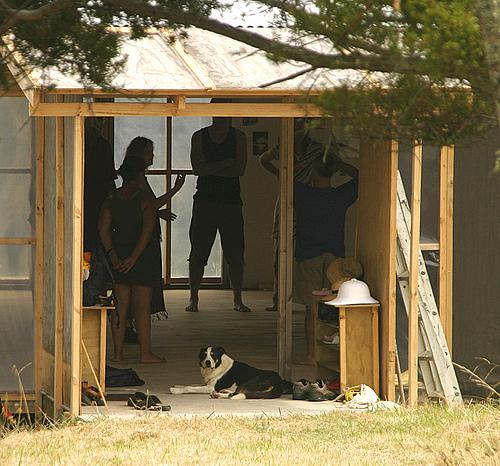

In [78]:
ig = Image.open("image7.jpg")
ig

In [79]:
transform = T.ToTensor()
img = transform(ig)
img

tensor([[[0.2902, 0.2980, 0.2902,  ..., 0.6118, 0.6078, 0.5608],
         [0.2549, 0.2706, 0.2824,  ..., 0.5490, 0.5412, 0.5765],
         [0.2118, 0.2392, 0.2706,  ..., 0.5373, 0.4863, 0.5647],
         ...,
         [0.8902, 0.9137, 0.9882,  ..., 0.8314, 0.9843, 0.9451],
         [0.8039, 1.0000, 0.9686,  ..., 0.9373, 0.8863, 0.9647],
         [0.8157, 0.9333, 0.9294,  ..., 0.9569, 0.8824, 0.9294]],

        [[0.2667, 0.2745, 0.2667,  ..., 0.5882, 0.5843, 0.5373],
         [0.2314, 0.2471, 0.2588,  ..., 0.5216, 0.5137, 0.5490],
         [0.1882, 0.2157, 0.2471,  ..., 0.5098, 0.4588, 0.5373],
         ...,
         [0.7765, 0.8039, 0.8706,  ..., 0.7412, 0.8902, 0.8549],
         [0.6863, 0.8824, 0.8510,  ..., 0.8392, 0.7882, 0.8667],
         [0.6941, 0.8118, 0.8157,  ..., 0.8510, 0.7765, 0.8235]],

        [[0.2039, 0.2118, 0.2039,  ..., 0.4000, 0.3961, 0.3490],
         [0.1686, 0.1843, 0.1961,  ..., 0.3412, 0.3333, 0.3686],
         [0.1255, 0.1529, 0.1843,  ..., 0.3451, 0.2941, 0.

In [80]:
with torch.no_grad():
    pred = model([img])
pred

[{'boxes': tensor([[183.0784, 110.0521, 255.2504, 315.0490],
          [ 95.9040, 135.2557, 187.8194, 374.6156],
          [169.1780, 344.0891, 292.0363, 400.1353],
          [264.3319, 152.0235, 280.7549, 312.8846],
          [106.8443, 187.0443, 145.2959, 265.7893],
          [394.4208, 166.0530, 414.1393, 379.7603],
          [128.9981, 391.2308, 161.8521, 407.2909],
          [ 82.8948, 250.1347,  92.1689, 283.2690],
          [ 93.3742, 187.4747, 154.2241, 289.6053],
          [291.8750, 377.3333, 331.9178, 400.6488],
          [149.9489, 278.5549, 169.1976, 320.0694],
          [395.9123, 236.2539, 408.6286, 370.3955],
          [ 83.2942, 125.8878, 116.5567, 305.5765],
          [106.4430, 366.4572, 145.4615, 388.0026],
          [105.9659, 366.0775, 144.8106, 387.4026],
          [128.1556, 392.9246, 165.5137, 410.2629],
          [ 85.5401, 246.6387, 115.5763, 304.3349],
          [ 83.4475, 249.4611, 107.4358, 306.7045],
          [394.3848, 167.9953, 414.0569, 381.1601],
   

In [81]:
bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]
num = torch.argwhere(scores>0.9).shape[0]
num

3

In [82]:
import cv2
igg = cv2.imread("image7.jpg")
igg

array([[[ 52,  68,  74],
        [ 54,  70,  76],
        [ 52,  68,  74],
        ...,
        [102, 150, 156],
        [101, 149, 155],
        [ 89, 137, 143]],

       [[ 43,  59,  65],
        [ 47,  63,  69],
        [ 50,  66,  72],
        ...,
        [ 87, 133, 140],
        [ 85, 131, 138],
        [ 94, 140, 147]],

       [[ 32,  48,  54],
        [ 39,  55,  61],
        [ 47,  63,  69],
        ...,
        [ 88, 130, 137],
        [ 75, 117, 124],
        [ 95, 137, 144]],

       ...,

       [[138, 198, 227],
        [142, 205, 233],
        [160, 222, 252],
        ...,
        [122, 189, 212],
        [163, 227, 251],
        [151, 218, 241]],

       [[113, 175, 205],
        [161, 225, 255],
        [153, 217, 247],
        ...,
        [147, 214, 239],
        [135, 201, 226],
        [154, 221, 246]],

       [[113, 177, 208],
        [143, 207, 238],
        [142, 208, 237],
        ...,
        [150, 217, 244],
        [131, 198, 225],
        [143, 210, 237]]

In [83]:
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    print(x1,y1,x2,y2)
    break

183 110 255 315


In [84]:
font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    class_name = coco_names[labels.numpy()[i]-1]
    igg = cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
    igg = cv2.putText(igg, class_name, (x1,y1-10),font,0.5,(255,0,0),1,cv2.LINE_AA)

In [ ]:
plt.imshow(igg)

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pycocotools.coco import COCO
from PIL import Image

# Paths
ann_file = r'C:\Users\LENOVO\Practices\nf2\subset_annotations.json'  # COCO annotation file
image_dir = r'C:\Users\LENOVO\Practices\nf2'  # Folder containing original images

# Load COCO annotations
coco = COCO(ann_file)

# Get all image IDs
image_ids = coco.getImgIds()

# Select one image by ID (you can pick any image ID from the dataset)
img_id = image_ids[0]  # For example, use the first image

# Load image and its annotations
img_info = coco.loadImgs(img_id)[0]
image_path = os.path.join(image_dir, img_info['file_name'])
image = Image.open(image_path).convert('RGB')

# Ground truth annotations (bounding boxes)
ann_ids = coco.getAnnIds(imgIds=img_id)
anns = coco.loadAnns(ann_ids)
true_boxes = [ann['bbox'] for ann in anns]  # Ground truth bounding boxes

# Convert COCO bbox format (x, y, width, height) to (x1, y1, x2, y2) for plotting
true_boxes = [[x, y, x + w, y + h] for (x, y, w, h) in true_boxes]

# Display the image
fig, ax = plt.subplots(1)
ax.imshow(image)

# Plot the ground truth bounding boxes
for box in true_boxes:
    x1, y1, x2, y2 = box
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='g', facecolor='none')  # Green for ground truth
    ax.add_patch(rect)

# Add a title
plt.title(f"Image: {img_info['file_name']} with Ground Truth Bounding Boxes")

# Show the plot
plt.show()


In [87]:
# Initialize False Negatives and True Negatives
total_false_negatives = 0
total_true_negatives = 0

# Process each image
for img_id in image_ids:
    # Load image and its annotations
    img_info = coco.loadImgs(img_id)[0]
    image_path = os.path.join(image_dir, img_info['file_name'])
    image = Image.open(image_path).convert('RGB')
    
    # Transform the image (if necessary)
    image_tensor = T.ToTensor()(image).unsqueeze(0)
    
    # Ground truth annotations
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    true_boxes = [ann['bbox'] for ann in anns]  # Ground truth bounding boxes
    
    # Convert COCO bbox format (x, y, width, height) to (x1, y1, x2, y2)
    true_boxes = [[x, y, x + w, y + h] for (x, y, w, h) in true_boxes]
    
    # Model predictions
    with torch.no_grad():
        predictions = model(image_tensor)
    
    pred_boxes = predictions[0]['boxes'].cpu().numpy()  # Predicted bounding boxes
    pred_scores = predictions[0]['scores'].cpu().numpy()  # Prediction confidence scores
    
    # Filter out predictions with low scores (e.g., below 0.5 confidence)
    score_threshold = 0.9
    pred_boxes = pred_boxes[pred_scores > score_threshold]
    
    # Match predicted boxes to ground truth boxes using IoU
    matched_true_boxes = set()  # To track ground truth boxes that have been matched
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    
    # Check each predicted box
    for pred_box in pred_boxes:
        best_iou = 0
        best_gt_box = None
        
        # Find the ground truth box with the highest IoU for this prediction
        for i, true_box in enumerate(true_boxes):
            iou = calculate_iou(pred_box, true_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_box = i
        
        # If IoU is above the threshold, count as a true positive, else false positive
        if best_iou >= iou_threshold and best_gt_box not in matched_true_boxes:
            true_positives += 1
            matched_true_boxes.add(best_gt_box)  # Mark the ground truth box as matched
        else:
            false_positives += 1

    # Calculate False Negatives: Unmatched ground truth boxes
    false_negatives = len(true_boxes) - len(matched_true_boxes)

    total_true_positives += true_positives
    total_false_positives += false_positives
    total_false_negatives += false_negatives

    print(f"Processed image: {img_info['file_name']} - True Positives: {true_positives}, False Positives: {false_positives}, False Negatives: {false_negatives}")

# Calculate Precision and Recall
precision = total_true_positives / (total_true_positives + total_false_positives)
recall = total_true_positives / (total_true_positives + total_false_negatives)

print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")


Processed image: 2010_006329_jpg.rf.f43fa1b2045931bb4fad2f873e377b45.jpg - True Positives: 0, False Positives: 11, False Negatives: 1
Processed image: 2008_001026_jpg.rf.133bbe5ff82e330061956672f128a946.jpg - True Positives: 1, False Positives: 0, False Negatives: 0
Processed image: 2009_000351_jpg.rf.e806c5c3ea3c9e59b894ddbc48305c4c.jpg - True Positives: 1, False Positives: 0, False Negatives: 0
Processed image: 2010_005734_jpg.rf.83b7cb1975b242f715453de44929f96e.jpg - True Positives: 1, False Positives: 1, False Negatives: 0
Processed image: 2012_001339_jpg.rf.c37324faf84b89aa06e30caa1c02d3b1.jpg - True Positives: 1, False Positives: 1, False Negatives: 0
Processed image: 2009_002387_jpg.rf.28ec73b5385a9853b43e8626619c68cd.jpg - True Positives: 1, False Positives: 0, False Negatives: 0
Processed image: 2010_004370_jpg.rf.f66d5598ee5d40ffec2229aa083432a6.jpg - True Positives: 1, False Positives: 0, False Negatives: 1
Processed image: 2010_001118_jpg.rf.6bd9ab7d23fd1c3ffc6cc199faf2ce15

In [88]:
f1_score = (2 * (precision*recall)) / (precision+recall)

# Print the F1 score
print(f"F1 Score: {f1_score:.4f}")

F1 Score: 0.6747


In [90]:
import torch
from PIL import Image
import os
import numpy as np

# Function to calculate IoU (Intersection over Union)
def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    unionArea = boxAArea + boxBArea - interArea
    
    iou = interArea / unionArea
    return iou

# Paths
image_dir = r'C:\Users\LENOVO\Practices\val\images'  # Folder containing original images
label_dir = r'C:\Users\LENOVO\Practices\val\labels'  # Folder containing label files

# Load your pre-trained model
model.eval()  # Set model to evaluation mode

# IoU threshold for determining a "true positive"
iou_threshold = 0.6

# For calculating precision
total_true_positives = 0
total_false_positives = 0

# Get all image filenames (assuming they have corresponding label files)
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

# Process each image
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    label_path = os.path.join(label_dir, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))

    # Load image
    image = Image.open(image_path).convert('RGB')

    # Ground truth annotations (from label file)
    true_boxes = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                cls_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:])
                
                # Convert from YOLO format (x_center, y_center, width, height) to (x1, y1, x2, y2)
                x1 = (x_center - width / 2) * image.width
                y1 = (y_center - height / 2) * image.height
                x2 = (x_center + width / 2) * image.width
                y2 = (y_center + height / 2) * image.height
                
                true_boxes.append([x1, y1, x2, y2])

    # Transform the image
    image_tensor = T.ToTensor()(image).unsqueeze(0)

    # Model predictions
    with torch.no_grad():
        predictions = model(image_tensor)

    pred_boxes = predictions[0]['boxes'].cpu().numpy()  # Predicted bounding boxes
    pred_scores = predictions[0]['scores'].cpu().numpy()  # Prediction confidence scores

    # Filter out predictions with low scores (e.g., below 0.5 confidence)
    score_threshold = 0.9
    pred_boxes = pred_boxes[pred_scores > score_threshold]

    # Match predicted boxes to ground truth boxes using IoU
    matched_true_boxes = set()  # To track ground truth boxes that have been matched
    true_positives = 0
    false_positives = 0

    for pred_box in pred_boxes:
        best_iou = 0
        best_gt_box = None

        # Find the ground truth box with the highest IoU for this prediction
        for i, true_box in enumerate(true_boxes):
            iou = calculate_iou(pred_box, true_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_box = i
        
        # If IoU is above the threshold, count as a true positive, else false positive
        if best_iou >= iou_threshold and best_gt_box not in matched_true_boxes:
            true_positives += 1
            matched_true_boxes.add(best_gt_box)  # Mark the ground truth box as matched
        else:
            false_positives += 1

    total_true_positives += true_positives
    total_false_positives += false_positives

    print(f"Processed image: {image_file} - True Positives: {true_positives}, False Positives: {false_positives}")

# Calculate Precision
precision = total_true_positives / (total_true_positives + total_false_positives)

print(f"Overall Precision: {precision:.4f}")


Processed image: frame_0399.jpg - True Positives: 5, False Positives: 1
Processed image: frame_0400.jpg - True Positives: 5, False Positives: 0
Processed image: frame_0401.jpg - True Positives: 4, False Positives: 0
Processed image: frame_0402.jpg - True Positives: 5, False Positives: 0
Processed image: frame_0403.jpg - True Positives: 4, False Positives: 0
Processed image: frame_0404.jpg - True Positives: 3, False Positives: 2
Processed image: frame_0405.jpg - True Positives: 4, False Positives: 1
Processed image: frame_0406.jpg - True Positives: 4, False Positives: 0
Processed image: frame_0407.jpg - True Positives: 4, False Positives: 0
Processed image: frame_0408.jpg - True Positives: 4, False Positives: 0
Processed image: frame_0409.jpg - True Positives: 4, False Positives: 0
Processed image: frame_0410.jpg - True Positives: 4, False Positives: 0
Processed image: frame_0411.jpg - True Positives: 4, False Positives: 1
Processed image: frame_0412.jpg - True Positives: 4, False Posit